### 1. 데이터 그룹 연산 - group by 
    통계자료에서 그룹 함수 가장 많이 사용한다.
    그룹핑 시키는방법
    합, 평균, 최대, 최소... 총합 기능이 다 제공된다
    사용자 정의 함수 만들고 가져다 쓰는 방법도 소개
    
    df.groupby(
    by=None,
    axis=0,
    level=None,
    as_index: bool = True,
    sort: bool = True,
    group_keys: bool = True,
    squeeze: bool = <object object at 0x000001C5E60887A0>,
    observed: bool = False,
    dropna: bool = True,
    )

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
df = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})
df

,Gender,Smoking,CountA,CountB
0,Female,Smoker,6,6
1,Male,Smoker,7,8
2,Female,Smoker,9,9
3,Male,Non-Smoker,3,7
4,Female,Non-Smoker,1,5
5,Male,Non-Smoker,5,2
6,Female,Non-Smoker,3,8
7,Female,Smoker,3,1


In [3]:
# groupby()함수로 데이터를 세분화(그뤂핑)하면, DataFrameGroupBy객체가 리턴된다.
# 이 객체만으로는 아무것도 못한다.
# 1. 객체를 리턴받고
# 2. 통계함수를 적용

# 계산가능한 통계 함수만 적용가능하다
# Numeric컬럼이 아니라서 계산이 안됨
df.groupby('Gender').sum()

,CountA,CountB
Gender,,
Female,22,29
Male,15,17


In [4]:
df.groupby('Gender').mean()

,CountA,CountB
Gender,,
Female,4.4,5.800000
Male,5.0,5.666667


In [5]:
df.groupby('Gender').count()

,Smoking,CountA,CountB
Gender,,,
Female,5,5,5
Male,3,3,3


In [6]:
df.groupby('Gender').max()

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,9
Male,Smoker,7,8


In [7]:
df.groupby('Gender').min()

,Smoking,CountA,CountB
Gender,,,
Female,Non-Smoker,1,1
Male,Non-Smoker,3,2


In [8]:
df.groupby('Gender').all()

,Smoking,CountA,CountB
Gender,,,
Female,True,True,True
Male,True,True,True


In [9]:
df.groupby('Gender').any()

,Smoking,CountA,CountB
Gender,,,
Female,True,True,True
Male,True,True,True


In [10]:
df.groupby(['CountA','CountB']).max()

Gender     Smoking
CountA CountB                    
1      5       Female  Non-Smoker
3      1       Female      Smoker
       7         Male  Non-Smoker
       8       Female  Non-Smoker
5      2         Male  Non-Smoker
6      6       Female      Smoker
7      8         Male      Smoker
9      9       Female      Smoker

In [11]:
df.groupby(['Gender','Smoking']).count() # 리스트를 사용하면 다중 그룹핑가능하다. 물론 1개넣어도 가능.

CountA  CountB
Gender Smoking                   
Female Non-Smoker       2       2
       Smoker           3       3
Male   Non-Smoker       2       2
       Smoker           1       1

In [12]:
df.groupby(['Gender']).count() # 데이터프레임으로 반환 

,Smoking,CountA,CountB
Gender,,,
Female,5,5,5
Male,3,3,3


In [13]:
# 특정한 컬럼에 한해서 그룹핑,,, 시리즈로 반환한다.
df.groupby(['Gender'])['CountA'].count()

Gender
Female    5
Male      3
Name: CountA, dtype: int64

In [14]:
df.groupby(['Gender'])['CountA'].sum()
df.groupby(['Gender'])['CountA'].agg('sum') # >> 많이 사용하는 방법이다.

Gender
Female    22
Male      15
Name: CountA, dtype: int32

In [15]:
df.groupby(['Gender'])[['CountA']].agg('sum')

,CountA
Gender,
Female,22
Male,15


In [16]:
df.groupby(['Gender'])['CountA'].agg('sum',set(['CountA']))
df.groupby(['Gender'])['CountA'].agg(['sum'])

,sum
Gender,
Female,22
Male,15


In [17]:
df.groupby(['Gender'])[['CountA']].sum()

,CountA
Gender,
Female,22
Male,15


### aggregaion

In [18]:
df.groupby(['Gender'])['CountA'].agg(['sum','mean','count'])

,sum,mean,count
Gender,,,
Female,22,4.4,5
Male,15,5.0,3


# 실전데이터로 응용하기

In [19]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [20]:
# 1. 날짜별로 그뤂핑  
tipdf.groupby(['day']).agg('count')

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


<AxesSubplot:xlabel='day'>

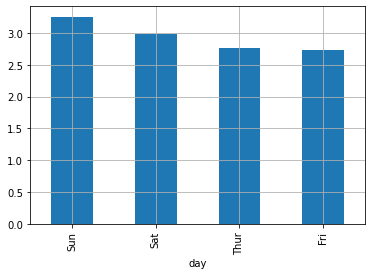

In [21]:
# 2. day를 그룹핑하고 요일별로 팁의 평균을 확인 정렬로 마무리. 시각화하라.
# tipdf.groupby(['day'])[['tip']].agg('mean').sort_values('tip').plot(kind='bar')
tip_group = tipdf.groupby(['day'])
tip_group['tip'].agg('mean').sort_values(ascending=False).plot(kind='bar', grid=True) # grid를 사용하면 좀더 빠르게 확인 가능함

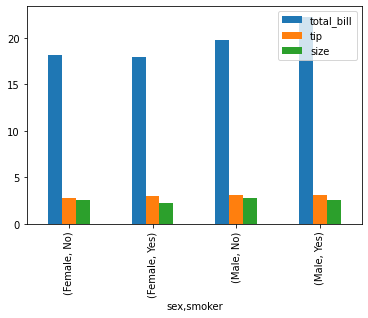

In [22]:
# 3. tipdf에서 성별로 먼저 그룹핑 하고, 나중에 다시 흡연여부로 그룹핑
tip_group2 = tipdf.groupby(by=['sex','smoker'])
tip_group2.agg('mean').plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='sex,smoker'>

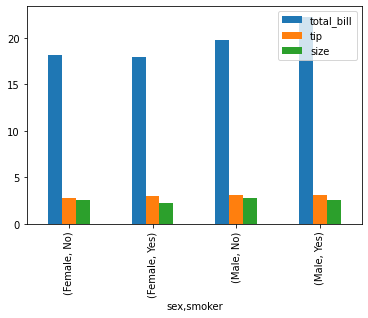

In [23]:
tip_group2 = tipdf.groupby(by=['sex','smoker'])
tip_group2.agg('mean').plot(kind='bar')

In [24]:
tip_group = tipdf.groupby(['day'])
tip_group['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

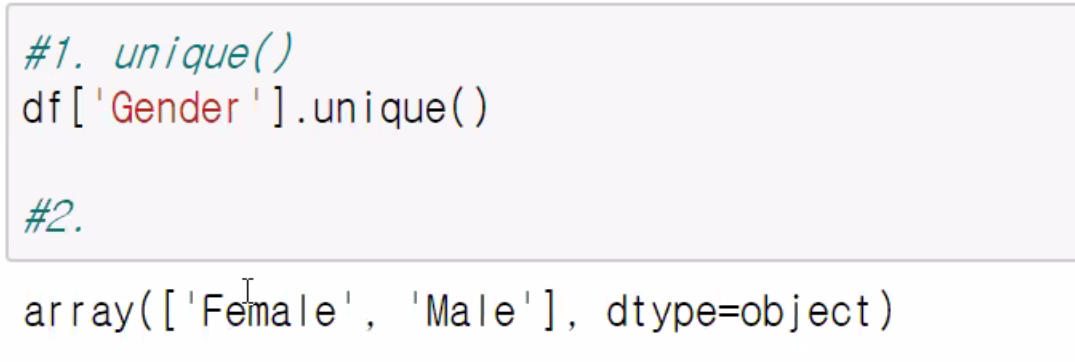
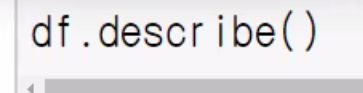

In [25]:
df['Gender'].unique()
df['Gender'].nunique()
df.describe() # 통계적인 수치를 알려준다.

,CountA,CountB
count,8.000000,8.000000
mean,4.625000,5.750000
std,2.615203,2.915476
min,1.000000,1.000000
25%,3.000000,4.250000
50%,4.000000,6.500000
75%,6.250000,8.000000
max,9.000000,9.000000


In [26]:
df['Smoking'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Smoker
1        Smoker
2        Smoker
3    Non-Smoker
4    Non-Smoker
5    Non-Smoker
6    Non-Smoker
7        Smoker
Name: Smoking, dtype: object>

### 6. apply()
    판다스에서 내가 함수를 만들어서 적용할때사용
    판다스에서 제공하지 않는 함수를 내가 직접 만들어서 사용할수 있다.

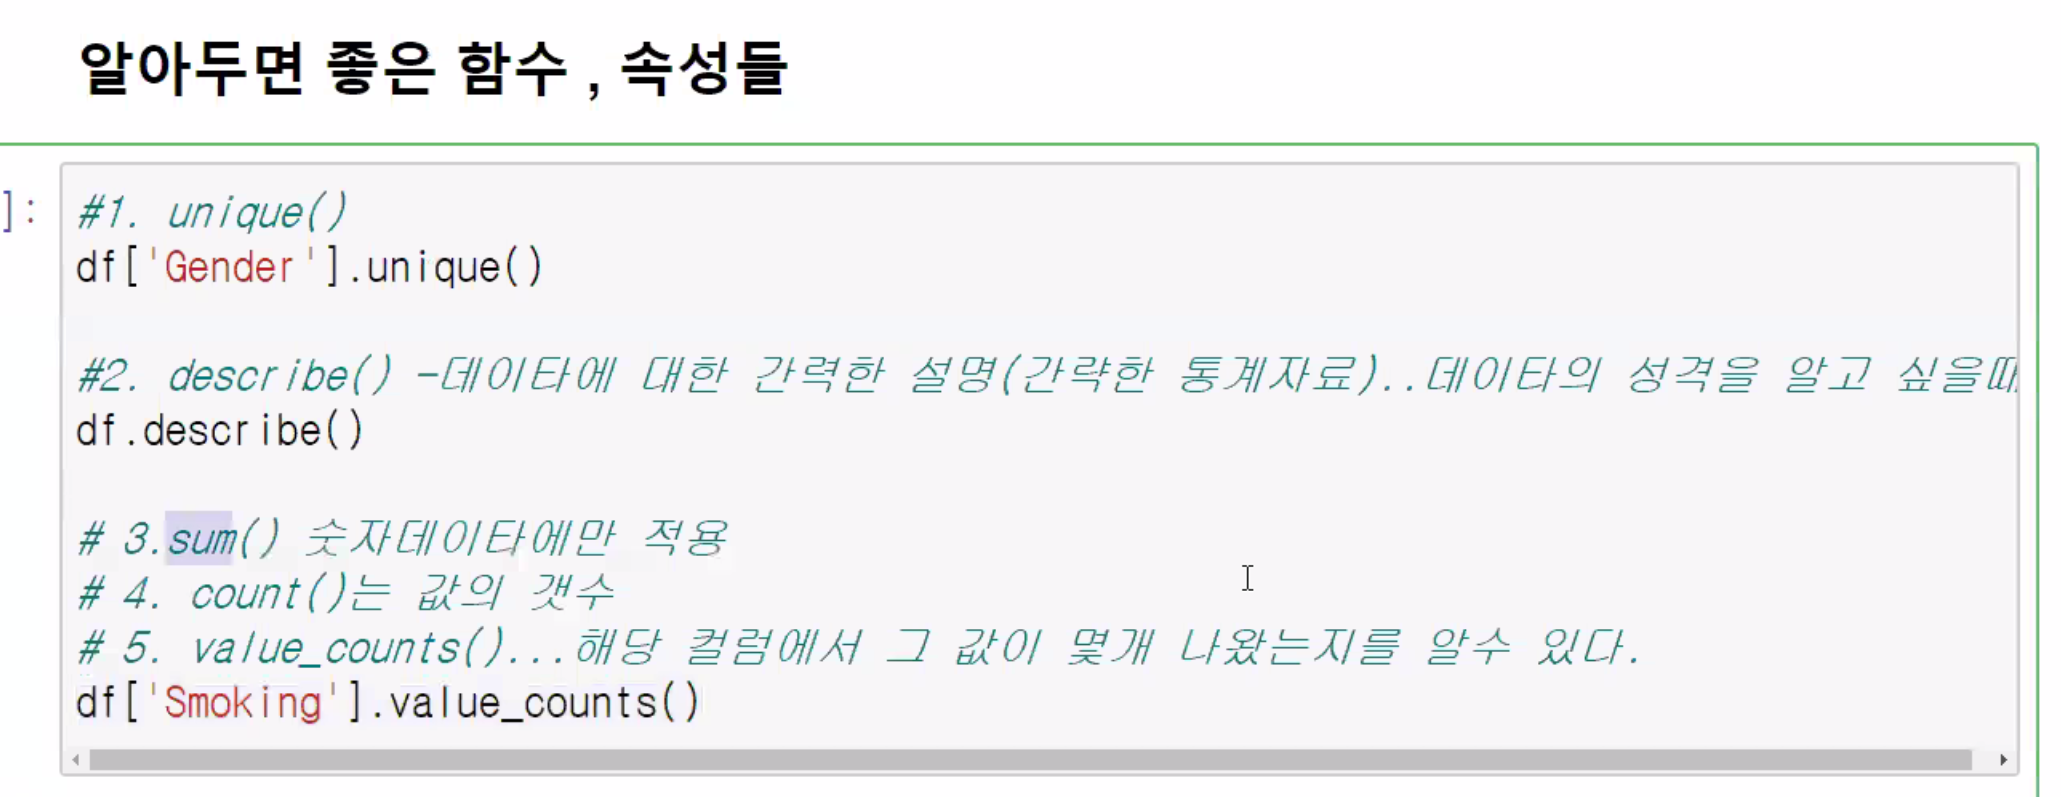

In [27]:
def __add(x):
    return x+100

df[['CountA']].apply(__add)

,CountA
0,106
1,107
2,109
3,103
4,101
5,105
6,103
7,103


In [28]:
# agg는 apply함수의 역할까지 한다.

def __add(x):
    return x+100

df[['CountA']].agg(__add)

,CountA
0,106
1,107
2,109
3,103
4,101
5,105
6,103
7,103
